In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.0 MB/s 
     |████████████████████████████████| 604 kB 60.0 MB/s 
     |████████████████████████████████| 145 kB 51.5 MB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# EasyOCR on different languages

In the Video Assistant for the Visually Impaired Software, we chose English as the language we want to predict in. However, EasyOCR is not limited by one language and can predict a host of different languages. We show this with examples of images in different languages and how the EasyOCR model predicts them. 




In [3]:
import easyocr
#import libraries to detect and display easyOCR images
import PIL
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [4]:
!unzip /content/gdrive/MyDrive/EasyOCRLanguages.zip #dataset with a few images of different languages

Archive:  /content/gdrive/MyDrive/EasyOCRLanguages.zip
   creating: EasyOCRLanguages/
  inflating: EasyOCRLanguages/japanese.jpeg  
  inflating: __MACOSX/EasyOCRLanguages/._japanese.jpeg  
  inflating: EasyOCRLanguages/chinese.jpeg  
  inflating: __MACOSX/EasyOCRLanguages/._chinese.jpeg  
  inflating: EasyOCRLanguages/french.jpeg  
  inflating: __MACOSX/EasyOCRLanguages/._french.jpeg  
  inflating: EasyOCRLanguages/thai.jpeg  
  inflating: __MACOSX/EasyOCRLanguages/._thai.jpeg  
  inflating: EasyOCRLanguages/korean.png  
  inflating: __MACOSX/EasyOCRLanguages/._korean.png  


In [5]:
# Draw bounding boxes on each image
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image


# Thai

['เส้นทางลัด', 'เพชรบุรี']


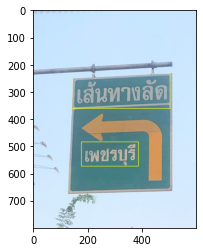

In [7]:
imThai = PIL.Image.open('/content/EasyOCRLanguages/thai.jpeg')
reader = easyocr.Reader(['th','en'])
bounds = reader.readtext('/content/EasyOCRLanguages/thai.jpeg')
plt.imshow(draw_boxes(imThai, bounds))
print([k[1] for k in bounds])

# Japanese

['ポイ橋て禁止』', 'NOLTTB', '清潔できれいな港区を', '潜 区 MNATOCITY']


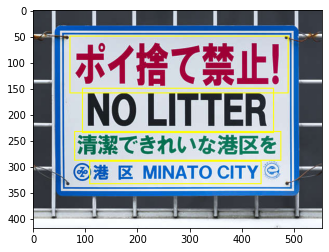

In [9]:
imJapanese = PIL.Image.open('/content/EasyOCRLanguages/japanese.jpeg')
reader = easyocr.Reader(['ja','en'])
bounds = reader.readtext('/content/EasyOCRLanguages/japanese.jpeg')
plt.imshow(draw_boxes(imJapanese, bounds))
print([k[1] for k in bounds])

# Chinese

['西', '愚園路', '東', '315', '309', 'W', 'Yuyuan Rd.', 'E']


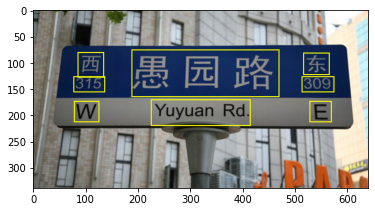

In [11]:
imChinese = PIL.Image.open('/content/EasyOCRLanguages/chinese.jpeg')
reader = easyocr.Reader(['ch_tra','en'])
bounds = reader.readtext('/content/EasyOCRLanguages/chinese.jpeg')
plt.imshow(draw_boxes(imChinese, bounds))
print([k[1] for k in bounds])

# French

['Mairie du /"', '[Palais du LOUVRE', 'LES ARTS DÉCORATIFS', '[Musée du LOUVRe', 'Théâtre', 'du PALAIS-RoYAl^']


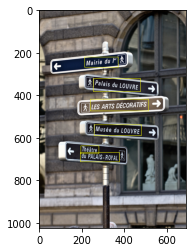

In [13]:
imFrench = PIL.Image.open('/content/EasyOCRLanguages/french.jpeg')
reader = easyocr.Reader(['fr','en'])
bounds = reader.readtext('/content/EasyOCRLanguages/french.jpeg')
plt.imshow(draw_boxes(imFrench, bounds))
print([k[1] for k in bounds])

# Korean

['서울', '평 양', 'Seoul', 'Pyeongyang', '56Km', '2O5Km']


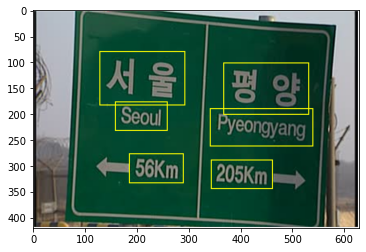

In [15]:
imKorean = PIL.Image.open('/content/EasyOCRLanguages/korean.png')
reader = easyocr.Reader(['ko','en'])
bounds = reader.readtext('/content/EasyOCRLanguages/korean.png')
plt.imshow(draw_boxes(imKorean, bounds))
print([k[1] for k in bounds])